In [1]:
import os
import sys
AbsPath = str(os.path.abspath(""))+"/../.."
sys.path.append(AbsPath)
import importlib
import pickle
import numpy as np
import matplotlib as mpl
import colossus.halo.mass_adv as massdefs
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
from Functions import Functions as F
from Scripts.Plots import SDSS_Plots
Add_SDSS = SDSS_Plots.SDSS_Plots(11.5,15,0.1) #pass this halomass:min, max, and binwidth for amting the SDSS plots
from colossus.cosmology import cosmology
cosmology.setCosmology("planck15")
Cosmo =cosmology.getCurrent()
HMF_fun = F.Make_HMF_Interp() #N Mpc^-3 h^3 dex^-1, Args are (Mass, Redshift)
h = Cosmo.h
h_3 = h*h*h

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/data/pg1g15/STEEL/Notebooks/Plots/../../Scripts/Plots/SDSS_Plots.py:94: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cavea

FRACKSKY= 0.1404020420493216


In [2]:
importlib.reload(F)

<module 'Functions.Functions' from '/data/pg1g15/STEEL/Notebooks/Plots/../../Functions/Functions.py'>

In [3]:
#set plot paramaters here
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20
plt.rcParams['font.size']=15
plt.rcParams['lines.linewidth']=2

In [4]:
#Abundance Matching Parameters
Override =\
{\
'M10':12.0,\
'SHMnorm10':0.032,\
'beta10':1.5,\
'gamma10':0.56,\
'M11':0.6,\
'SHMnorm11':-0.014,\
'beta11':-0.7,\
'gamma11':0.08\
}

AbnMtch =\
{\
'Behroozi13': False,\
'Behroozi18': False,\
'B18c':False,\
'B18t':False,\
'G18':False,\
'G18_notSE':False,\
'G19_SE':False,\
'G19_cMod':False,\
'Lorenzo18':False,\
'Moster': False,\
'Moster10': False,\
'Illustris':False,\
'z_Evo':True,\
'Scatter': 0.15,\
'Override_0': False,\
'Override_z': False,\
'Override': Override,\
'PFT': False,\
'M_PFT1': False,\
'M_PFT2': False,\
'M_PFT3': False,\
'N_PFT1': False,\
'N_PFT2': False,\
'N_PFT3': False,\
'b_PFT1': False,\
'b_PFT2': False,\
'b_PFT3': False,\
'g_PFT1': False,\
'g_PFT2': False,\
'g_PFT4': False,\
'HMevo': False,\
'HMevo_param': None\
}

Paramaters = \
{\
'AbnMtch' : AbnMtch,\
'AltDynamicalTime': 1,\
'NormRnd': 0.5,\
'SFR_Model': 'CE'\
}

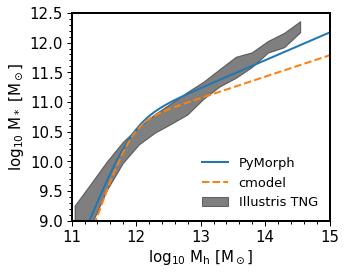

In [5]:
X = np.arange(10, 15, 0.1) #M h-1 #virial
f, axarr = plt.subplots(1, 1, figsize=(5,4))

AbnMtch['G19_SE'] = True
axarr.plot(np.arange(10, 15, 0.1)- np.log10(h), F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 0.1, Paramaters, ScatterOn = False), "-C0", label = "PyMorph")
AbnMtch['G19_SE'] = False

AbnMtch['G19_cMod'] = True
axarr.plot(np.arange(10, 15, 0.1)- np.log10(h), F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 0.1, Paramaters, ScatterOn = False), "--C1", label = "cmodel")
AbnMtch['G19_cMod'] = False

"""
AbnMtch['Illustris'] = True
axarr.plot(np.arange(10, 15, 0.1)- np.log10(h), F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 0.1, Paramaters, ScatterOn = False), ":k", label = "Illustris TNG")
AbnMtch['Illustris'] = False
#"""

SMHM_ill = np.load(AbsPath+'/Data/Observational/Illustris/SMHM_fillbtwn_99.npy')
axarr.fill_between(SMHM_ill[0], SMHM_ill[1], SMHM_ill[2], color = 'k', alpha = 0.5, label = 'Illustris TNG')

mpl.rcParams.update({'font.size': 13})
axarr.legend(loc = 4, frameon = False)



axarr.set_ylim(9, 12.5)
axarr.set_xlim(11, 15)
axarr.set_xlabel("$\mathrm{log_{10}}$ $\mathrm{M_h}$ $\mathrm{[M_\odot]}$")
axarr.set_ylabel("$\mathrm{log_{10}}$ $\mathrm{M_*}$ $\mathrm{[M_\odot]}$")
                                                                            
plt.tight_layout()

plt.savefig(AbsPath+"/Figures/Paper3/SMHM_lowz.png")
plt.savefig(AbsPath+"/Figures/Paper3/SMHM_lowz.pdf")

plt.show()

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


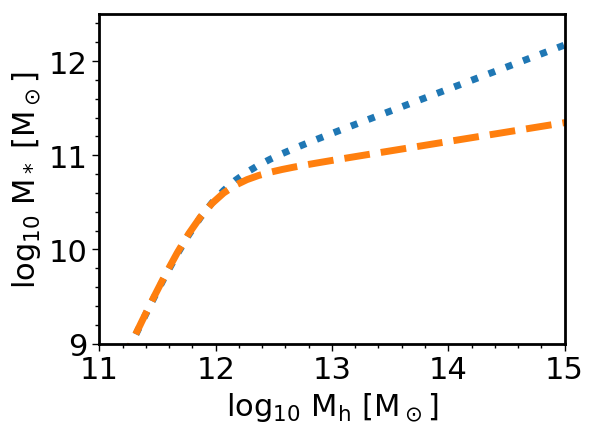

<Figure size 640x480 with 0 Axes>

In [6]:
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20
plt.rcParams['font.size']=22
plt.rcParams['lines.linewidth']=5

X = np.arange(10, 15, 0.1) #M h-1 #virial

AbnMtch['G19_SE'] = True
plt.plot(np.arange(10, 15, 0.1)- np.log10(h),\
         F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 0.1, Paramaters, ScatterOn = False), ":C0")
AbnMtch['G19_SE'] = False



Override =\
{\
'M10':11.925,\
'SHMnorm10':0.032,\
'beta10':1.639,\
'gamma10':0.8,\
'M11':0.576,\
'SHMnorm11':-0.014,\
'beta11':-0.693,\
'gamma11':0.03\
}

AbnMtch['Override'] = Override
AbnMtch['Override_z'] = True
plt.plot(np.arange(10, 15, 0.1)- np.log10(h),\
         F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 0.1, Paramaters, ScatterOn = False), "--C1")
AbnMtch['Override_z'] = False




plt.ylim(9, 12.5)
plt.xlim(11, 15)
plt.xlabel("$\mathrm{log_{10}}$ $\mathrm{M_h}$ $\mathrm{[M_\odot]}$")
plt.ylabel("$\mathrm{log_{10}}$ $\mathrm{M_*}$ $\mathrm{[M_\odot]}$")
plt.tight_layout()
plt.savefig(AbsPath+"/Figures/Paper3/SMHM_diff_Cartoon.png")
plt.show()
plt.clf()

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to acco

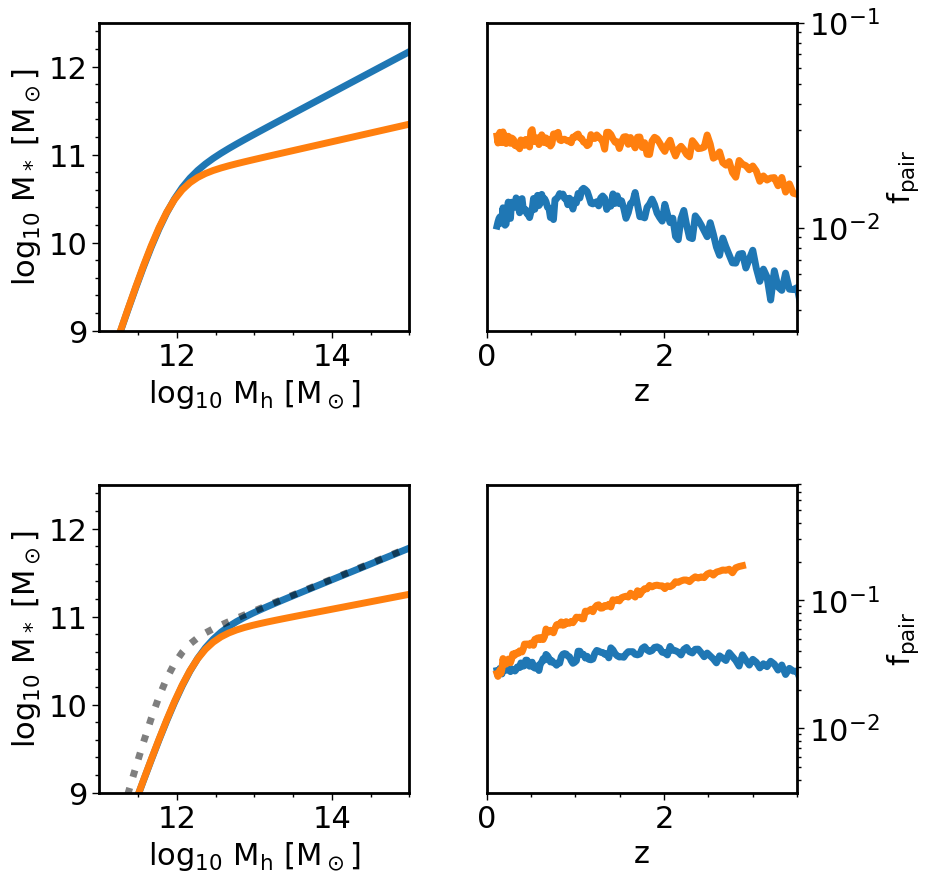

<Figure size 640x480 with 0 Axes>

In [42]:
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20
plt.rcParams['font.size']=22
plt.rcParams['lines.linewidth']=5

fig = plt.figure(figsize=[10,10])
gs = GridSpec(10, 10, hspace=0.0,wspace=0.0,figure=fig)
ax1 = fig.add_subplot(gs[0:4,0:4])
ax2 = fig.add_subplot(gs[0:4,5:9])
ax3 = fig.add_subplot(gs[6:10,0:4])
ax4 = fig.add_subplot(gs[6:10,5:9])

X = np.arange(10, 15, 0.1) #M h-1 #virial




PairFracs = np.load(AbsPath+"/Scripts/CentralPostprocessing/Extraplots3.npy")
PF_z = PairFracs[0]
PF_SE, PF_cMod, PF_HMEv0, PF_HMEv5 = PairFracs[1:]


#Axis1
AbnMtch['G19_SE'] = True
ax1.plot(np.arange(10, 15, 0.1)- np.log10(h),\
         F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 0.1, Paramaters, ScatterOn = False), "-C0")
AbnMtch['G19_SE'] = False

Override =\
{\
'M10':11.925,\
'SHMnorm10':0.032,\
'beta10':1.639,\
'gamma10':0.8,\
'M11':0.576,\
'SHMnorm11':-0.014,\
'beta11':-0.693,\
'gamma11':0.03\
}

AbnMtch['Override'] = Override
AbnMtch['Override_z'] = True
ax1.plot(np.arange(10, 15, 0.1)- np.log10(h),\
         F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 0.1, Paramaters, ScatterOn = False), "-C1")
AbnMtch['Override_z'] = False

ax1.set_ylim(9, 12.5)
ax1.set_xlim(11, 15)
ax1.set_xlabel("$\mathrm{log_{10}}$ $\mathrm{M_h}$ $\mathrm{[M_\odot]}$")
ax1.set_ylabel("$\mathrm{log_{10}}$ $\mathrm{M_*}$ $\mathrm{[M_\odot]}$")

#Axis2
ax2.plot(PF_z, PF_SE, "-C0")
ax2.plot(PF_z, PF_cMod, "-C1")

ax2.set_ylim(10**-2.5, 10**-1)
ax2.set_xlim(0.0, 3.5)
ax2.set_xlabel("z")
ax2.set_ylabel("$\mathrm{f_{pair}}$")
ax2.set_yscale('log')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()


#Axis3
AbnMtch["HMevo_param"] = 0.0
AbnMtch['HMevo'] = True
ax3.plot(np.arange(10, 15, 0.1)- np.log10(h),\
         F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 2, Paramaters, ScatterOn = False), "-C0")
ax3.plot(np.arange(10, 15, 0.1)- np.log10(h),\
         F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 0.1, Paramaters, ScatterOn = False), ":k", alpha = 0.5)
AbnMtch['HMevo'] = False

AbnMtch["HMevo_param"] = 0.3
AbnMtch['HMevo'] = True
ax3.plot(np.arange(10, 15, 0.1)- np.log10(h),\
         F.DarkMatterToStellarMass(np.arange(10, 15, 0.1) - np.log10(h), 2, Paramaters, ScatterOn = False), "-C1")
AbnMtch['HMevo'] = False
AbnMtch["HMevo_param"] = None

ax3.set_ylim(9, 12.5)
ax3.set_xlim(11, 15)
ax3.set_xlabel("$\mathrm{log_{10}}$ $\mathrm{M_h}$ $\mathrm{[M_\odot]}$")
ax3.set_ylabel("$\mathrm{log_{10}}$ $\mathrm{M_*}$ $\mathrm{[M_\odot]}$")

#Axis4
ax4.plot(PF_z, PF_HMEv0, "-C0")
ax4.plot(PF_z, PF_HMEv5, "-C1")

ax4.set_ylim(10**-2.5, 10**-0.1)
ax4.set_xlim(0.0, 3.5)
ax4.set_xlabel("z")
ax4.set_ylabel("$\mathrm{f_{pair}}$")
ax4.set_yscale('log')
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()




#WholePlot
plt.tight_layout()
plt.savefig(AbsPath+"/Figures/Paper3/SMHM_to_PF_Cartoon.png")
plt.show()
plt.clf()